Import Dependancies

In [25]:
# Dependencies
from config import (gkey)
import gmaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from ipywidgets.embed import embed_minimal_html
import gmaps.geojson_geometries

#import cleaned county data and county geo data
county_data = pd.read_csv("Resources/state_county_w_loc.csv")
county_geo_data = pd.read_csv("Resources/uscounties_all.csv")

#add in column for Average Life Expectancy
county_data["Life Exp Avg"]=((county_data["Difference in male life expectancy, 1985-2010 (years)"]+
                              county_data["Difference in female life expectancy, 1985-2010 (years)"])/2)

#merge dataframes together
complete_county_data = pd.merge(county_geo_data, county_data, on='Location')

In [4]:
#store all counties with negative life expectancy growth
negative_counties = complete_county_data.loc[(complete_county_data["Life Exp Avg"] < 0),:]

# turns all negative 'avg life ex' values to zero
complete_county_data.loc[(complete_county_data["Life Exp Avg"] < 0), "Life Exp Avg"] = 0

In [5]:
#view stats on average expectancy
complete_county_data['Life Exp Avg'].aggregate(['mean','median','var','std','min','max'])

mean       2.718570
median     2.700000
var        1.841566
std        1.357043
min        0.000000
max       10.700000
Name: Life Exp Avg, dtype: float64

In [6]:
# create two dataframes above mean and below mean
above_county_data = complete_county_data.loc[(complete_county_data["Life Exp Avg"] >= 2.7),:]
below_county_data = complete_county_data.loc[(complete_county_data["Life Exp Avg"] < 2.7),:]

In [7]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

## Average Growth in Life Expectancy

In [8]:
# Store 'Lat' and 'Lng' into  locations 
locations_a = above_county_data[["lat", "lng"]]
locations_b = below_county_data[["lat", "lng"]]

#set center
center = (37.1902, -95.7129)
fig1 = gmaps.figure(center=center, zoom_level=4)


#add state boundaries
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

gini_layer = gmaps.geojson_layer(states_geojson, fill_color='white',stroke_color='gray',fill_opacity=0)
fig1.add_layer(gini_layer)

#add below average layer 
below_avg = gmaps.heatmap_layer(locations_b, dissipating=False, weights=below_county_data['Life Exp Avg'],
                                max_intensity=10,point_radius = 1, gradient = ['white','blue'])
fig1.add_layer(below_avg)

#add above average layer 
above_avg = gmaps.heatmap_layer(locations_a, dissipating=False, weights=above_county_data['Life Exp Avg'],
                                max_intensity=10, point_radius = .7)
fig1.add_layer(above_avg)


#add negative counties
neg_locs = negative_counties[['lat', 'lng']]
neg_counties = gmaps.symbol_layer(neg_locs, fill_color='white', stroke_color='white', scale=1)
fig1.add_layer(neg_counties)

#display map
fig1

Figure(layout=FigureLayout(height='420px'))

In [9]:
#export HTML
embed_minimal_html('export.html', views=[fig1])

# Charts

In [31]:
# pull in data from csv

Northeast_PA = pd.read_csv("Data_csv/Northeast_PA.csv")
Southeast_PA = pd.read_csv("Data_csv/Southeast_PA.csv")
Midwest_PA = pd.read_csv("Data_csv/Midwest_PA.csv")
Southwest_PA = pd.read_csv("Data_csv/Southwest_PA.csv")
West_PA = pd.read_csv("Data_csv/West_PA.csv")

Northeast_life_expect = pd.read_csv("Data_csv/Northeast_life_expect.csv")
Southeast_life_expect = pd.read_csv("Data_csv/Southeast_life_expect.csv")
Midwest_life_expect = pd.read_csv("Data_csv/Midwest_life_expect.csv")
Southwest_life_expect = pd.read_csv("Data_csv/Southwest_life_expect.csv")
West_life_expect = pd.read_csv("Data_csv/West_life_expect.csv")

Northeast_obes = pd.read_csv("Data_csv/Northeast_obes.csv")
Southeast_obes = pd.read_csv("Data_csv/Southeast_obes.csv")
Midwest_obes = pd.read_csv("Data_csv/Midwest_obes.csv")
Southwest_obes = pd.read_csv("Data_csv/Southwest_obes.csv")
West_obes = pd.read_csv("Data_csv/West_obes.csv")

state_data_df = pd.read_csv('Data_csv/state_life_avg.csv')
state_PA_df = pd.read_csv("Data_csv/state_PA_avg.csv")
state_obes_df = pd.read_csv("Data_csv/state_obes_avg.csv")

us_df = pd.read_csv("Data_csv/US.csv")
us_obes_df = pd.read_csv("Data_csv/US_obes.csv")
us_Pa_df = pd.read_csv("Data_csv/US_PA.csv")

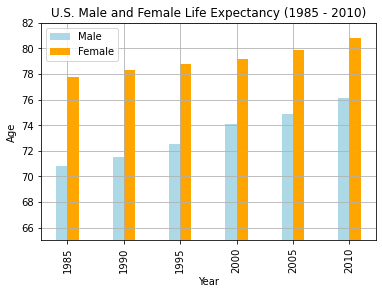

In [14]:
x = np.arange(6)

male_life_ex = [us_df['Male life expectancy, 1985 (years)'][0],
                us_df['Male life expectancy, 1990 (years)'][0],
                us_df['Male life expectancy, 1995 (years)'][0],
                us_df['Male life expectancy, 2000 (years)'][0],
                us_df['Male life expectancy, 2005 (years)'][0],
                us_df['Male life expectancy, 2010 (years)'][0]]
female_life_ex = [us_df['Female life expectancy, 1985 (years)'][0],
                us_df['Female life expectancy, 1990 (years)'][0],
                us_df['Female life expectancy, 1995 (years)'][0],
                us_df['Female life expectancy, 2000 (years)'][0],
                us_df['Female life expectancy, 2005 (years)'][0],
                us_df['Female life expectancy, 2010 (years)'][0]]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, male_life_ex, width, color='lightblue')
plt.bar(x, female_life_ex, width, color='orange')
# # Set Title and labels
plt.title('U.S. Male and Female Life Expectancy (1985 - 2010)')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid()
# plt.xlim(-0.25, len(x_axis))
plt.ylim(65, 82)
x_axis = np.arange(len(male_life_ex))
Gender=['Male','Female']
labels = [1985, 1990, 1995, 2000, 2005, 2010]
tick_locations = [value-0.1 for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.legend(Gender,loc=2)
plt.savefig('output_data/Male and Female Life Expectancy (1985 - 2010).png', bbox_inches='tight')
plt.show()

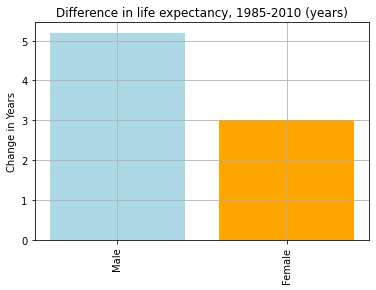

In [48]:
gen_com = us_df[['Difference in male life expectancy, 1985-2010 (years)', 'Difference in female life expectancy, 1985-2010 (years)']]
gen_com = gen_com.transpose()
gen_com = gen_com.rename(index={'Difference in male life expectancy, 1985-2010 (years)': 'Male', 'Difference in female life expectancy, 1985-2010 (years)': 'Female'})
colors = ['lightblue', 'orange']

x_axis = np.arange(len(gen_com))

plt.bar(x_axis, 
        gen_com[0], 
        color=colors, 
        align='edge')
plt.grid()
plt.title('Difference in Life Expectancy, 1985-2010')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, gen_com.index, rotation="vertical")
# # Set Title and labels
plt.title('Difference in life expectancy, 1985-2010 (years)')
plt.ylabel('Change in Years')
plt.savefig('output_data/Difference in life expectancy, 1985-2010 (years).png', bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

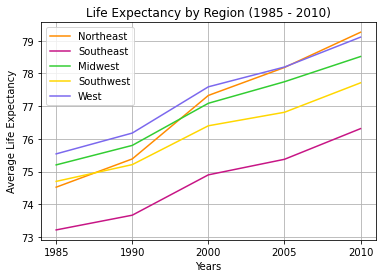

In [17]:
#find average life expectancy for each region
ne_mean = Northeast_life_expect.mean()
se_mean = Southeast_life_expect.mean()
mw_mean = Midwest_life_expect.mean()
sw_mean = Southwest_life_expect.mean()
we_mean = West_life_expect.mean()

#create dateframe
life_by_region = pd.DataFrame({
    "Northeast": ne_mean,
    "Southeast": se_mean,
    "Midwest": mw_mean,
    "Southwest": sw_mean,
    "West": we_mean
})

life_by_region = life_by_region.T

#find total average
life_by_region['1985'] = ((life_by_region['Male life expectancy, 1985 (years)'] + 
                           life_by_region['Female life expectancy, 1985 (years)'])/2)

life_by_region['1990'] = ((life_by_region['Male life expectancy, 1990 (years)'] + 
                           life_by_region['Female life expectancy, 1990 (years)'])/2)

life_by_region['2000'] = ((life_by_region['Male life expectancy, 2000 (years)'] + 
                           life_by_region['Female life expectancy, 2000 (years)'])/2)

life_by_region['2005'] = ((life_by_region['Male life expectancy, 2005 (years)'] + 
                           life_by_region['Female life expectancy, 2005 (years)'])/2)

life_by_region['2010'] = ((life_by_region['Male life expectancy, 2010 (years)'] + 
                           life_by_region['Female life expectancy, 2010 (years)'])/2)

#clean dataframe and prep for plotting
life_by_region = life_by_region[['1985','1990', '2000', '2005', '2010']]
life_by_region = life_by_region.T

#plot
years = ['1985','1990', '2000', '2005', '2010']

ne_life = plt.plot(years, life_by_region['Northeast'], color="darkorange", label='Northeast')
se_life = plt.plot(years, life_by_region['Southeast'], color="mediumvioletred", label='Southeast')
mw_life = plt.plot(years, life_by_region['Midwest'], color="limegreen", label='Midwest')
sw_life = plt.plot(years, life_by_region['Southwest'], color="gold", label='Southwest')
we_life = plt.plot(years, life_by_region['West'], color="mediumslateblue", label='West')

plt.figsize=(9,6)
plt.legend(loc="best")
plt.title('Life Expectancy by Region (1985 - 2010)')
plt.xlabel('Years')
plt.ylabel('Average Life Expectancy')
plt.grid()

plt.savefig('output_data/Life Expectancy by Region', pad_inches=0.1, facecolor='w')
plt.show

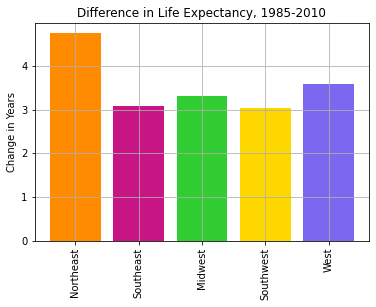

In [19]:
Northeast_life_expect['avg diff in l.e.'] = ((Northeast_life_expect['Difference in male life expectancy, 1985-2010 (years)']
                                            + Northeast_life_expect['Difference in female life expectancy, 1985-2010 (years)'])/2)

Southeast_life_expect['avg diff in l.e.'] = ((Southeast_life_expect['Difference in male life expectancy, 1985-2010 (years)']
                                            + Southeast_life_expect['Difference in female life expectancy, 1985-2010 (years)'])/2)

Midwest_life_expect['avg diff in l.e.'] = ((Midwest_life_expect['Difference in male life expectancy, 1985-2010 (years)']
                                            + Midwest_life_expect['Difference in female life expectancy, 1985-2010 (years)'])/2)

Southwest_life_expect['avg diff in l.e.'] = ((Southwest_life_expect['Difference in male life expectancy, 1985-2010 (years)']
                                            + Southwest_life_expect['Difference in female life expectancy, 1985-2010 (years)'])/2)

West_life_expect['avg diff in l.e.'] = ((West_life_expect['Difference in male life expectancy, 1985-2010 (years)']
                                            + West_life_expect['Difference in female life expectancy, 1985-2010 (years)'])/2)

avg_diff_le_by_region = pd.DataFrame({
    "Northeast": Northeast_life_expect['avg diff in l.e.'].mean(),
    "Southeast": Southeast_life_expect['avg diff in l.e.'].mean(),
    "Midwest": Midwest_life_expect['avg diff in l.e.'].mean(),
    "Southwest": Southwest_life_expect['avg diff in l.e.'].mean(),
    "West": West_life_expect['avg diff in l.e.'].mean()
}, index=[2]).transpose()
color = ['darkorange', 'mediumvioletred', 'limegreen', 'gold', 'mediumslateblue']
avg_diff_le_by_region.rename(columns={2:'Difference in Life Expectancy, 1985-2010'}, inplace=True)


x_axis = np.arange(len(avg_diff_le_by_region))
avg_diff_le_by_region['Difference in Life Expectancy, 1985-2010']

plt.bar(x_axis, 
        avg_diff_le_by_region['Difference in Life Expectancy, 1985-2010'], 
        color=color, 
        align='edge')
plt.grid()
plt.title('Difference in Life Expectancy, 1985-2010')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, avg_diff_le_by_region.index, rotation="vertical")
plt.ylabel('Change in Years')
plt.savefig('output_data/Difference in Life Expectancy, 1985-2010.png', bbox_inches='tight')


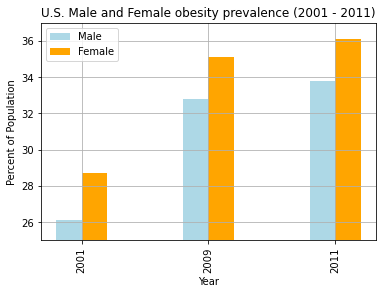

In [20]:
x = np.arange(3)

male_obes = [us_obes_df['Male obesity prevalence, 2001 (%)'][0],
            us_obes_df['Male obesity prevalence, 2009 (%)'][0],
            us_obes_df['Male obesity  prevalence, 2011* (%)'][0]]

female_obes = [us_obes_df['Female obesity prevalence, 2001 (%)'][0],
            us_obes_df['Female obesity  prevalence, 2009 (%)'][0],
            us_obes_df['Female obesity prevalence, 2011* (%)'][0]]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, male_obes, width, color='lightblue')
plt.bar(x, female_obes, width, color='orange')
# # Set Title and labels
plt.title('U.S. Male and Female obesity prevalence (2001 - 2011)')
plt.xlabel('Year')
plt.ylabel('Percent of Population')
plt.grid()
# plt.xlim(-0.25, len(x_axis))
plt.ylim(25, 37)
x_axis = np.arange(len(male_obes))
Gender=['Male','Female']
labels = [2001, 2009, 2011]
tick_locations = [value-0.1 for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.legend(Gender,loc=2)
plt.savefig('output_data/Male and Female obesity prevalence (2001 - 2011).png', bbox_inches='tight')
plt.show()

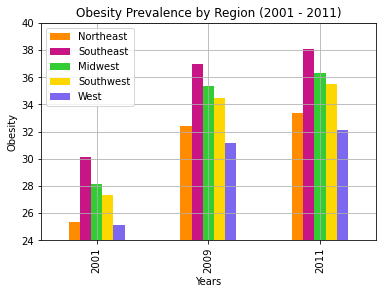

In [39]:
ne_mean = Northeast_obes.mean()
se_mean = Southeast_obes.mean()
mw_mean = Midwest_obes.mean()
sw_mean = Southwest_obes.mean()
we_mean = West_obes.mean()
obes_by_region = pd.DataFrame({
    "Northeast": ne_mean,
    "Southeast": se_mean,
    "Midwest": mw_mean,
    "Southwest": sw_mean,
    "West": we_mean
})
obes_by_region = obes_by_region.transpose()
obes_by_region['2001'] = ((obes_by_region['Male obesity prevalence, 2001 (%)']
                        + obes_by_region['Female obesity prevalence, 2001 (%)'])/2)
obes_by_region['2009'] = ((obes_by_region['Male obesity prevalence, 2009 (%)']
                        + obes_by_region['Female obesity  prevalence, 2009 (%)'])/2)
obes_by_region['2011'] = ((obes_by_region['Male obesity  prevalence, 2011* (%)']
                        + obes_by_region['Female obesity prevalence, 2011* (%)'])/2)
obes_by_region = obes_by_region[['2001', '2009', '2011']]
obes_by_region = obes_by_region.transpose()
years = ['2001', '2009', '2011']

obes_by_region.plot(kind='bar',ylim=(24,40), color=color)

plt.legend(loc="best")
plt.title('Obesity Prevalence by Region (2001 - 2011)')
plt.xlabel('Years')
plt.ylabel('Obesity')
plt.grid()
plt.savefig('output_data/Obesity Prevalence by Region (2001 - 2011).png', bbox_inches='tight')
plt.show()

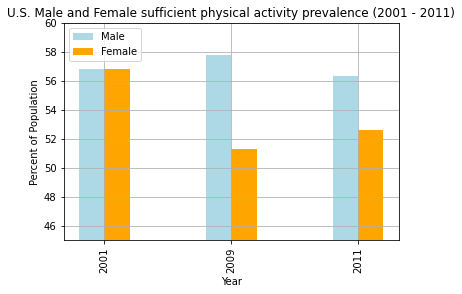

In [22]:
x = np.arange(3)
male_PA = [us_Pa_df['Male sufficient physical activity prevalence, 2001 (%)'][0],
        us_Pa_df['Male sufficient physical activity  prevalence, 2009 (%)'][0],
        us_Pa_df['Male sufficient physical activity  prevalence, 2011* (%)'][0]]

female_PA = [us_Pa_df['Male sufficient physical activity prevalence, 2001 (%)'][0],
            us_Pa_df['Female sufficient physical activity  prevalence, 2009 (%)'][0],
            us_Pa_df['Female sufficient physical activity  prevalence, 2011* (%)'][0]]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, male_PA, width, color='lightblue')
plt.bar(x, female_PA, width, color='orange')
# # Set Title and labels
plt.title('U.S. Male and Female sufficient physical activity prevalence (2001 - 2011)')
plt.xlabel('Year')
plt.ylabel('Percent of Population')
plt.grid()
# plt.xlim(-0.25, len(x_axis))
plt.ylim(45, 60)
x_axis = np.arange(len(male_PA))
Gender=['Male','Female']
labels = [2001, 2009, 2011]
tick_locations = [value-0.1 for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.legend(Gender,loc=2)
plt.savefig('output_data/Male and Female sufficient physical activity prevalence (2001 - 2011).png', bbox_inches='tight')
plt.show()

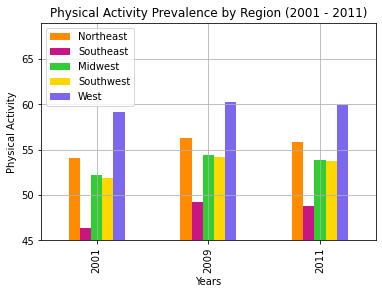

In [38]:
ne_mean = Northeast_PA.mean()
se_mean = Southeast_PA.mean()
mw_mean = Midwest_PA.mean()
sw_mean = Southwest_PA.mean()
we_mean = West_PA.mean()

PA_by_region = pd.DataFrame({
    "Northeast": ne_mean,
    "Southeast": se_mean,
    "Midwest": mw_mean,
    "Southwest": sw_mean,
    "West": we_mean
})

PA_by_region = PA_by_region.transpose()

PA_by_region['2001'] = ((PA_by_region['Male sufficient physical activity prevalence, 2001 (%)']
                        + PA_by_region['Female sufficient physical activity prevalence, 2001 (%)'])/2)
PA_by_region['2009'] = ((PA_by_region['Male sufficient physical activity  prevalence, 2009 (%)']
                        + PA_by_region['Female sufficient physical activity  prevalence, 2009 (%)'])/2)
PA_by_region['2011'] = ((PA_by_region['Male sufficient physical activity  prevalence, 2011* (%)']
                        + PA_by_region['Female sufficient physical activity  prevalence, 2011* (%)'])/2)

PA_by_region = PA_by_region[['2001', '2009', '2011']]
PA_by_region = PA_by_region.transpose()

years = ['2001', '2009', '2011']

PA_by_region.plot(kind='bar',ylim=(45,69), color=color)


plt.legend(loc="best")
plt.title('Physical Activity Prevalence by Region (2001 - 2011)')
plt.xlabel('Years')
plt.ylabel('Physical Activity')

plt.grid()
plt.savefig('output_data/Physical Activity Prevalence by Region (2001 - 2011).png', bbox_inches='tight')
plt.show()

The r-value is: 0.18560353660108436


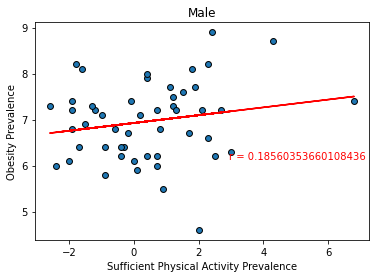

In [35]:
# set x and y values
x_values = state_PA_df["Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)"]
y_values = state_obes_df['Difference in male obesity prevalence, 2001-2009 (percentage points)']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="r", ec="k", lw='1',)

r_value = f'r = {rvalue}'
# add the equation to the plot
plt.annotate(r_value,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.58, .37),
            fontsize=10,
            color='red')
# set the title and axis labels
plt.xlabel('Sufficient Physical Activity Prevalence')
plt.ylabel('Obesity Prevalence')
plt.title('Male')
plt.savefig("output_data/Difference in Male Physical Activity Prevalence vs. Obesity Prevalence 2001-2009.png")

plt.show()

The r-value is: -0.07796966618805262


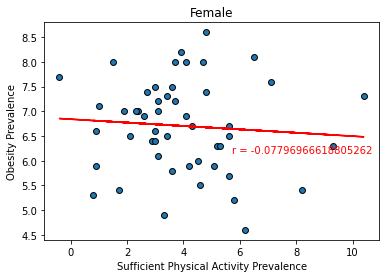

In [34]:
# set x and y values
x_values = state_PA_df["Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)"]
y_values = state_obes_df['Difference in female obesity prevalence, 2001-2009 (percentage points)']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="r", ec="k", lw='1',)

r_value = f'r = {rvalue}'
# add the equation to the plot
plt.annotate(r_value,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.56, .40),
            fontsize=10,
            color='red')
# set the title and axis labels
plt.xlabel('Sufficient Physical Activity Prevalence')
plt.ylabel('Obesity Prevalence')
plt.title('Female')
plt.savefig("output_data/Difference in Female Physical Activity Prevalence vs. Obesity Prevalence 2001-2009.png")

plt.show()

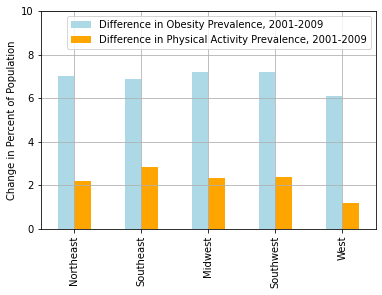

In [37]:
Southwest_obes['avg diff in obes prev'] = ((Southwest_obes['Difference in male obesity prevalence, 2001-2009 (percentage points)']
                        + Southwest_obes['Difference in female obesity prevalence, 2001-2009 (percentage points)'])/2)

West_obes['avg diff in obes prev'] = ((West_obes['Difference in male obesity prevalence, 2001-2009 (percentage points)']
                        + West_obes['Difference in female obesity prevalence, 2001-2009 (percentage points)'])/2)

Midwest_obes['avg diff in obes prev'] = ((Midwest_obes['Difference in male obesity prevalence, 2001-2009 (percentage points)']
                        + Midwest_obes['Difference in female obesity prevalence, 2001-2009 (percentage points)'])/2)

Southeast_obes['avg diff in obes prev'] = ((Southeast_obes['Difference in male obesity prevalence, 2001-2009 (percentage points)']
                        + Southeast_obes['Difference in female obesity prevalence, 2001-2009 (percentage points)'])/2)

Northeast_obes['avg diff in obes prev'] = ((Northeast_obes['Difference in male obesity prevalence, 2001-2009 (percentage points)']
                        + Northeast_obes['Difference in female obesity prevalence, 2001-2009 (percentage points)'])/2)

Northeast_PA['avg diff in p.a.'] = ((Northeast_PA['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)']
                        + Northeast_PA['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'])/2)

Southeast_PA['avg diff in p.a.'] = ((Southeast_PA['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)']
                        + Southeast_PA['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'])/2)

Midwest_PA['avg diff in p.a.'] = ((Midwest_PA['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)']
                        + Midwest_PA['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'])/2)

West_PA['avg diff in p.a.'] = ((West_PA['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)']
                        + West_PA['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'])/2)

Southwest_PA['avg diff in p.a.'] = ((Southwest_PA['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)']
                        + Southwest_PA['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'])/2)

avg_diff_PA_by_region = pd.DataFrame({
    "Northeast": Northeast_PA['avg diff in p.a.'].mean(),
    "Southeast": Southeast_PA['avg diff in p.a.'].mean(),
    "Midwest": Midwest_PA['avg diff in p.a.'].mean(),
    "Southwest": Southwest_PA['avg diff in p.a.'].mean(),
    "West": West_PA['avg diff in p.a.'].mean()
}, index=[0]).transpose()

avg_diff_obes_by_region = pd.DataFrame({
    "Northeast": Northeast_obes['avg diff in obes prev'].mean(),
    "Southeast": Southeast_obes['avg diff in obes prev'].mean(),
    "Midwest": Midwest_obes['avg diff in obes prev'].mean(),
    "Southwest": Southwest_obes['avg diff in obes prev'].mean(),
    "West": West_obes['avg diff in obes prev'].mean()
}, index=[1]).transpose()

avg_diff = pd.concat([avg_diff_obes_by_region, avg_diff_PA_by_region], axis=1)

avg_diff.rename(columns={1:'Difference in Obesity Prevalence, 2001-2009',
                        0: 'Difference in Physical Activity Prevalence, 2001-2009'}, inplace=True)

colors = ['lightblue', 'orange']
avg_diff.plot(kind='bar',ylim=(0,10), grid=True, color=colors)
plt.ylabel('Change in Percent of Population')
plt.title('')
plt.savefig('output_data/Difference in Obesity & Physical Activity Prevalence by regopm, 2001-2009.png', bbox_inches='tight')
